
# Project: We Rate Dogs Data Cleaning
Richard

# Gathering Data

In [1]:
#Import packages used. 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json 
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
# Load file from folder
tweets = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Assign URL to response using requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# Download to current folder
open(url.split('/')[-1], 'wb').write(response.content)
predictions = pd.read_csv(url.split('/')[-1], sep='\t')

In [ ]:
#Twitter API
# Keys are hidden. You can obtain your own from twitter or just use the 'tweet_json.txt' file
api_key = 'HIDDEN'
api_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
tweet_ids = list(tweets.tweet_id)
twitter_query = {}
fails = {}
# Appending dictionaries to twitter_query
start = timer() #Timing how long the loop takes
for id in tweet_ids:
    try:
        tweet = api.get_status(id, tweet_mode='extended')
        twitter_query[id] = tweet._json 
    except tweepy.TweepError as error:
        fails[id] = error
        pass
end = timer()
print(end - start)
# Loading JSON into file 
with open('tweet_json.txt', 'w') as file:
    json.dump(twitter_query , file)

In [4]:
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
# Create Dictionary twitter_data from file
twitter_data = []
for id in data.keys():
    retweets = data[id]['retweet_count']
    likes = data[id]['favorite_count']
    twitter_data.append({'tweet_id' : id,
                       "retweets" : retweets,
                         "likes" : likes})
# Turn into pandas df
twitter_data = pd.DataFrame(twitter_data)

# Assessing Data

In [5]:
# Retweets are creating extra ratings. 
tweets[tweets.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [6]:
# Null Values, Incorrect Dtypes.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
# Notice the ratings under 10 (Does not comply with rating standards)
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [8]:
# Notice the denominators above 10
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
# Some dogs have 'None' and 'a' as a name
tweets.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Scruffers      1
Chesney        1
Rupert         1
Jockson        1
Tessa          1
Name: name, Length: 957, dtype: int64

In [10]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Wierd dog predictions: paper_towel, orange
predictions.p1.value_counts

<bound method IndexOpsMixin.value_counts of 0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object>

In [12]:
#doggo,floofer,pupper,puppo columns are redundant 
tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [13]:
#Multiple prediction columns
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Cleaning Data

In [14]:
# Creating copies of the dataframes.
tweets_clean = tweets.copy()
predictions_clean = predictions.copy()
twitter_clean = twitter_data.copy()

In [15]:
# Don't want columns where in_reply_to_status_id has values
tweets_clean = tweets_clean[tweets_clean['in_reply_to_status_id'].isnull()]
tweets_clean.shape

(2278, 17)

In [16]:
# Dropped unwanted columns to remove null values from dataframe
tweets_clean = tweets_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                   'retweeted_status_id','retweeted_status_user_id',
                  'retweeted_status_timestamp', 'expanded_urls'],axis = 1)

In [17]:
# Changed incorrect datatypes
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)
predictions_clean['tweet_id'] =predictions_clean['tweet_id'].astype(str)
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'])

In [18]:
# Removed rows with denominator not 10
tweets_clean = tweets_clean.query('rating_denominator == 10')
# Removed rows with numerator less than 10
tweets_clean = tweets_clean.query('rating_numerator >= 10')
# Removed dogs with names 'None' and 'a'
tweets_clean = tweets_clean[(tweets_clean['name'] != 'None') & (tweets_clean['name'] != 'a')]

In [19]:
# Dropped more columns from dataframes
tweets_clean = tweets_clean.drop(['source', 'text'],axis = 1)
predictions_clean = predictions_clean.drop('img_num', axis = 1)

In [20]:
# Create prediction_count, prediction, confidence, and prediction_correct columns
# to replace the previous columns to make the dataframe look nicer
melt1 = predictions_clean.melt(id_vars=['tweet_id','jpg_url'],value_vars=['p1','p2','p3'],
                              var_name = "prediction_count",value_name = "predictions")
melt2 = predictions_clean.melt(id_vars=['tweet_id','jpg_url'], value_vars=['p1_conf','p2_conf','p3_conf'],
                              value_name = "confidence")
melt3 = predictions_clean.melt(id_vars=['tweet_id','jpg_url'], value_vars=['p1_dog','p2_dog','p3_dog'],
                              value_name = "prediction_correct")
predictions_clean = pd.concat([melt1,melt2["confidence"],melt3['prediction_correct']],axis=1)

In [21]:
# Loop to remove rows that contain certain key-words in the predictions column 
wack_predictions = ["orange", "banana", "traffic_light","paper_towel","spatula","Cardigan",
                    "academic_gown",'trench_coat','cheeseburger','paintbrush']
for nonsense in wack_predictions:
    predictions_clean = predictions_clean[predictions_clean['predictions'] != nonsense]

In [22]:
# Remove doggo, floofer, pupper, puppo columns and create one stage column that contains all the information
tweets_cleanish = tweets_clean.melt(id_vars=['tweet_id','timestamp','rating_numerator','rating_denominator','name'],
                                  value_name = 'stage')
tweets_cleanish = tweets_cleanish[tweets_cleanish['stage'] != 'None']
tweets_clean = tweets_clean.merge(tweets_cleanish[['tweet_id','stage']],
                                  how = 'left').drop(['doggo','floofer','pupper','puppo'], axis = 1)
tweets_clean['stage'] = tweets_clean['stage'].fillna("None")

In [23]:
# Merge tweets_clean and twitter_clean dataframes
tweets_clean = tweets_clean.merge(twitter_clean, on = ['tweet_id'], how = 'inner')

In [24]:
# Saving cleaned files for later
tweets_clean.to_csv('twitter_archive_master.csv', index = False)
predictions_clean.to_csv('image_predictions_clean.csv', index = False)

# Analysis

In [25]:
# Read the files that were saved earlier
twitter = pd.read_csv('twitter_archive_master.csv')
predict = pd.read_csv('image_predictions_clean.csv')

In [26]:
# Creating values low_rating and high_rating
twitter['rating'] = twitter.rating_numerator/twitter.rating_denominator
mean = twitter['rating'].mean()
low_rating = twitter[twitter['rating']< mean]
high_rating = twitter[twitter['rating'] >= mean]

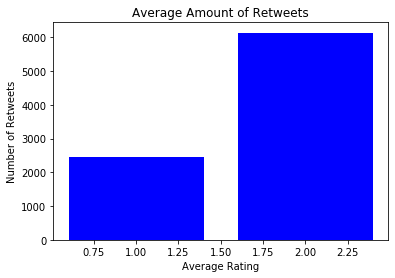

In [27]:
# Plot bar graph
plt.bar([1,2],[low_rating.retweets.mean(),high_rating.retweets.mean()], color = 'b')
plt.title("Average Amount of Retweets")
plt.ylabel("Number of Retweets")
plt.xlabel("Average Rating");

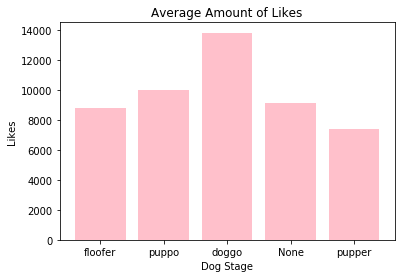

In [28]:
# Getting the average rating for each dog stage
likes = []
stage = list(set(twitter['stage']))
for dog in stage:
    dog_stage = twitter[twitter['stage'] == dog]
    likes.append(dog_stage.likes.mean())  
# Plot bar graph   
plt.bar([1,2,3,4,5],likes,tick_label = stage,color = 'pink')
plt.title('Average Amount of Likes')
plt.ylabel('Likes')
plt.xlabel('Dog Stage');

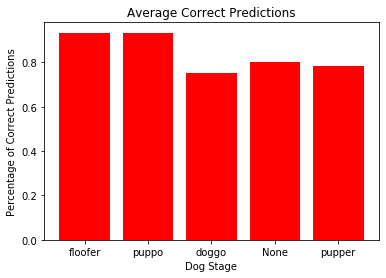

In [29]:
# Merging master dataframe with predictions dataframe
df_merge = twitter.merge(predict)
# Getting the prediction probability for each dog group
correct = [] 
for dog in stage:
    dog_type = df_merge[df_merge['stage'] == dog]
    correct.append(dog_type.prediction_correct.mean())
correct
# Plot bar graph
plt.bar([1,2,3,4,5],correct,tick_label = stage,color = 'r')
plt.title('Average Correct Predictions')
plt.ylabel('Percentage of Correct Predictions')
plt.xlabel('Dog Stage');

# Conclusions
1. On average dogs with higher ratings also have a higher number of retweets
2. Doggo's get the most amount of likes on average 
3. Floofer and Puppo's are the easiest dog for the algorithim to predict (90% success rate!) 